In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2.Load Dataset
data = pd.read_csv("VCB Historical Data final.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,12/01/2017,36620.0,36847.0,37075.0,36392.0,2.66M,-0.41%
1,12/04/2017,37454.0,36772.0,37454.0,36620.0,2.48M,2.28%
2,12/05/2017,36468.0,37151.0,37909.0,36468.0,2.52M,-2.63%
3,12/06/2017,36392.0,36392.0,36620.0,35710.0,2.68M,-0.21%
4,12/07/2017,36089.0,36392.0,36392.0,35407.0,3.49M,-0.83%
...,...,...,...,...,...,...,...
1371,06/05/2023,98000.0,95200.0,98700.0,95200.0,1.30M,3.27%
1372,06/06/2023,99000.0,98000.0,99000.0,96500.0,759.50K,1.02%
1373,06/07/2023,97000.0,99000.0,99000.0,97000.0,749.60K,-2.02%
1374,06/08/2023,100000.0,97000.0,101700.0,97000.0,1.34M,3.09%


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1376 non-null   object 
 1   Price     1376 non-null   float64
 2   Open      1376 non-null   float64
 3   High      1376 non-null   float64
 4   Low       1376 non-null   float64
 5   Vol.      1376 non-null   object 
 6   Change %  1376 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.4+ KB


,Price,Open,High,Low
count,1376.000000,1376.000000,1376.000000,1376.000000
mean,66180.946948,66123.944041,66962.237645,65310.408430
std,15338.628380,15340.420842,15481.638346,15160.994459
min,33360.000000,33360.000000,34194.000000,31540.000000
25%,51989.000000,51912.000000,52583.750000,51362.750000
50%,67715.500000,67578.000000,68153.500000,66810.000000
75%,77400.000000,77342.000000,78585.000000,76400.000000
max,100500.000000,100000.000000,102000.000000,99000.000000


In [4]:
#Chọn thuộc tính
data = data[['Price']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,Price
0,36620.0
1,37454.0
2,36468.0
3,36392.0
4,36089.0
...,...
1371,98000.0
1372,99000.0
1373,97000.0
1374,100000.0


<Axes: >

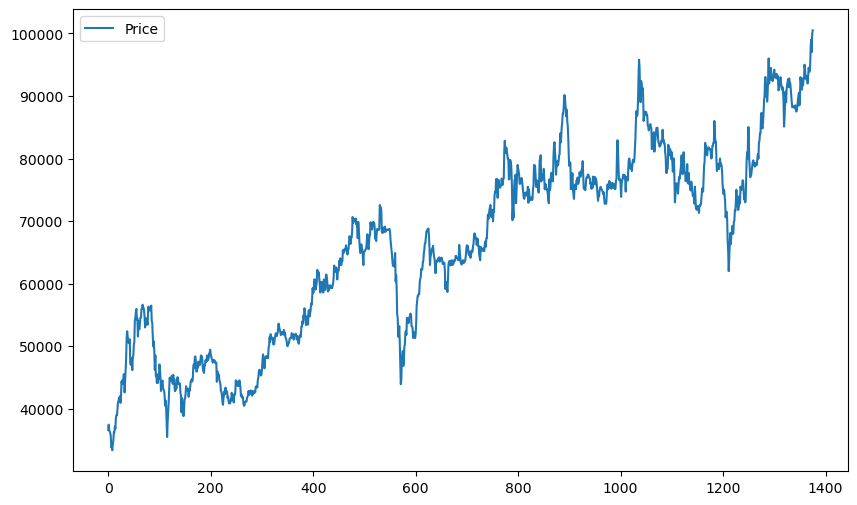

In [5]:
data.plot(figsize=(10,6))

In [6]:
# Chia tập dữ liệu thành train, test, validate (65-25-10)
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.65 * len(data))
test_size = int(0.25 * len(data))
val_size = len(data) - train_size - test_size

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))
print("Validate data size:", len(val_data))

Train data size: 894
Test data size: 344
Validate data size: 138


In [7]:
!pip install pmdarima

In [8]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15106.855, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15104.459, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15106.453, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15106.458, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15104.740, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15108.265, Time=0.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.744 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [9]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [16]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày 
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán 30 ngày tiếp theo
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# # In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[88005.47816349 88062.95632699 88120.43449048 88177.91265398
 88235.39081747 88292.86898096 88350.34714446 88407.82530795
 88465.30347144 88522.78163494 88580.25979843 88637.73796193
 88695.21612542 88752.69428891 88810.17245241 88867.6506159
 88925.1287794  88982.60694289 89040.08510638 89097.56326988
 89155.04143337 89212.51959686 89269.99776036 89327.47592385
 89384.95408735 89442.43225084 89499.91041433 89557.38857783
 89614.86674132 89672.34490482]


In [17]:
# Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 5987.7354659419425
Testing RMSE: 21454.81199334511


In [18]:
# MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape_validate = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
print('Validation MAPE:', mape_validate)
print('Testing MAPE:', mape_test)

Validation MAPE: 5.519779589496579
Testing MAPE: 25.972768541261697


In [19]:
# MAE
mae_test = np.mean(np.abs(y_test - y_pred))
mae_val = np.mean(np.abs(y_val - y_pred_val))
print("Validation MAE:", mae_val)
print("Testing MAE:", mae_test)

Validation MAE: 4574.089001411942
Testing MAE: 19796.93959803638


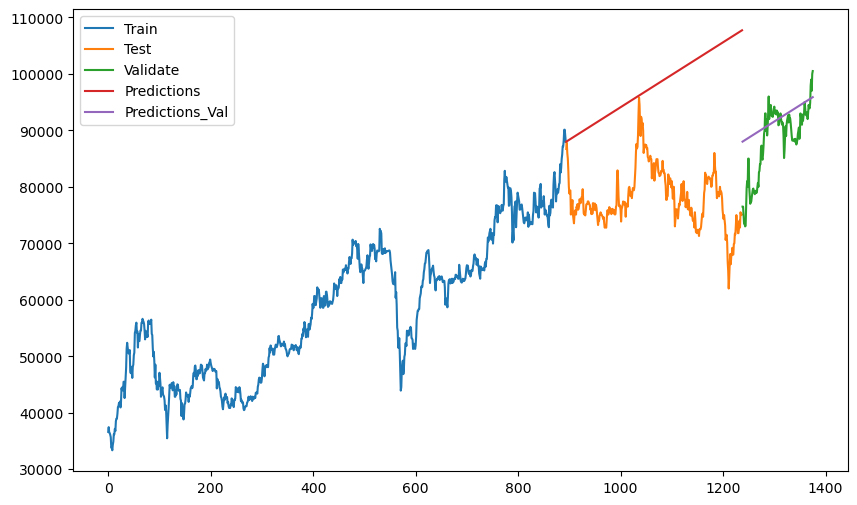

In [20]:
# Vẽ biểu đồ 
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test','Validate','Predictions','Predictions_Val'])
plt.show()

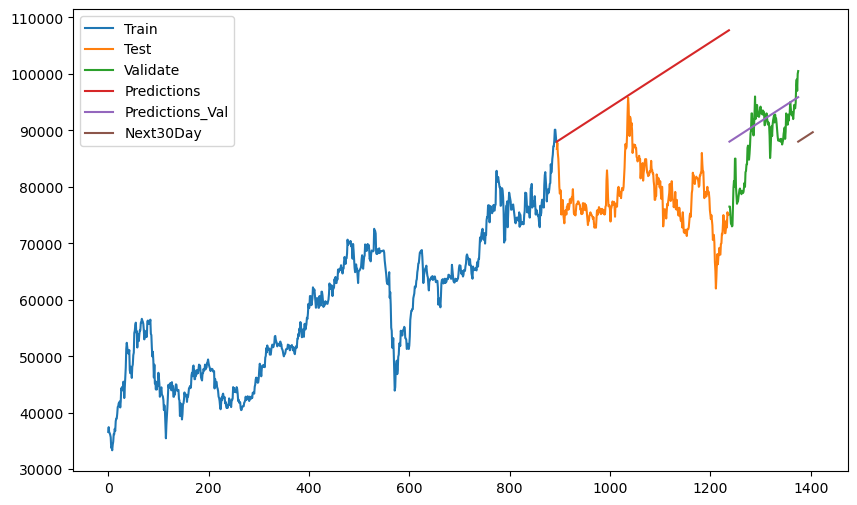

In [23]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Validate' ,'Predictions','Predictions_Val','Next30Day'])
plt.show()

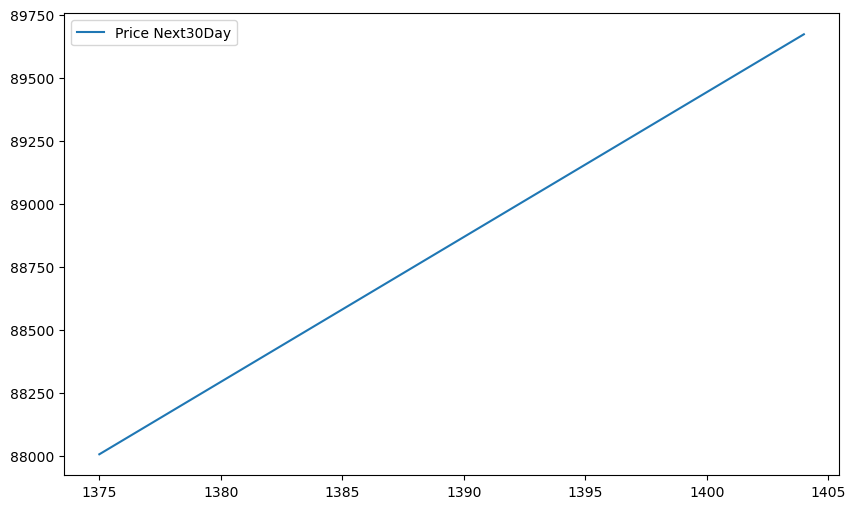

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_30_days)
plt.legend(['Price Next30Day'])
plt.show()